In [1]:
import torch 
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The Data does not contain any null values

In [7]:
X_data=data.drop('Outcome',axis=1).values
Y_data=data['Outcome'].values

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=25)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = Variable(torch.Tensor(X_train))
Y_train = Variable(torch.Tensor(Y_train))

X_test = Variable(torch.Tensor(X_test))
Y_test = Variable(torch.Tensor(Y_test))

In [11]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(torch.Size([614, 8]),
 torch.Size([614]),
 torch.Size([154, 8]),
 torch.Size([154]))

In [12]:
class LR(nn.Module):
    def __init__(self,n_features):
        super(LR,self).__init__()
        self.layer1=nn.Linear(n_features,1)

    def forward(self,x):
        out= torch.sigmoid(self.layer1(x))
        return out

In [13]:
model = LR(8)

In [14]:
optimizer = torch.optim.SGD(model.parameters() , lr = 0.001)

In [15]:
epochs=500
train_loss = []
for epoch in range(epochs):
    ypred = model(X_train)
    loss = F.mse_loss(torch.squeeze(ypred),Y_train)
    loss.backward()
    optimizer.step() 
    train_loss.append(loss.detach().numpy())
    optimizer.zero_grad()

Text(0, 0.5, 'Loss')

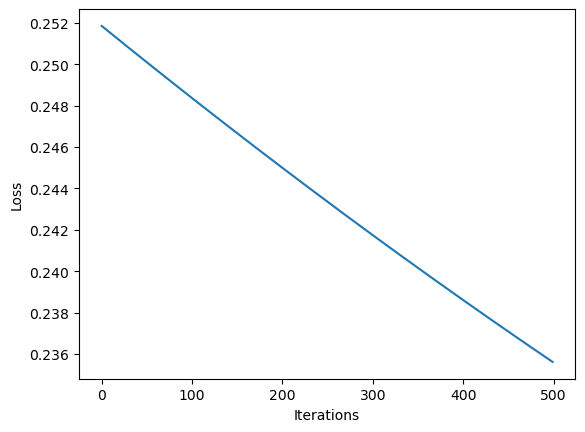

In [16]:
plt.plot(train_loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")

In [17]:
with torch.no_grad():
    ypred = model(X_test)
    ypred_cls = ypred.round()
    acc = ypred_cls.eq(Y_test).sum()/float(Y_test.shape[0])
    print(f'accuracy={acc:4f}')

accuracy=83.753250


# The accuracy of defined model is ~83%